In [82]:
import numpy as np
from numpy import sqrt,exp,cos,sin,pi,hanning,real,imag
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import constants as c
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import integrate
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft
from scipy.fftpack import dct,idct
from scipy.io import wavfile

### Part 0

They sound very similar, though the clarinet is a sharper sound, while the saxophone is more muted.

### Part 1

#### A)

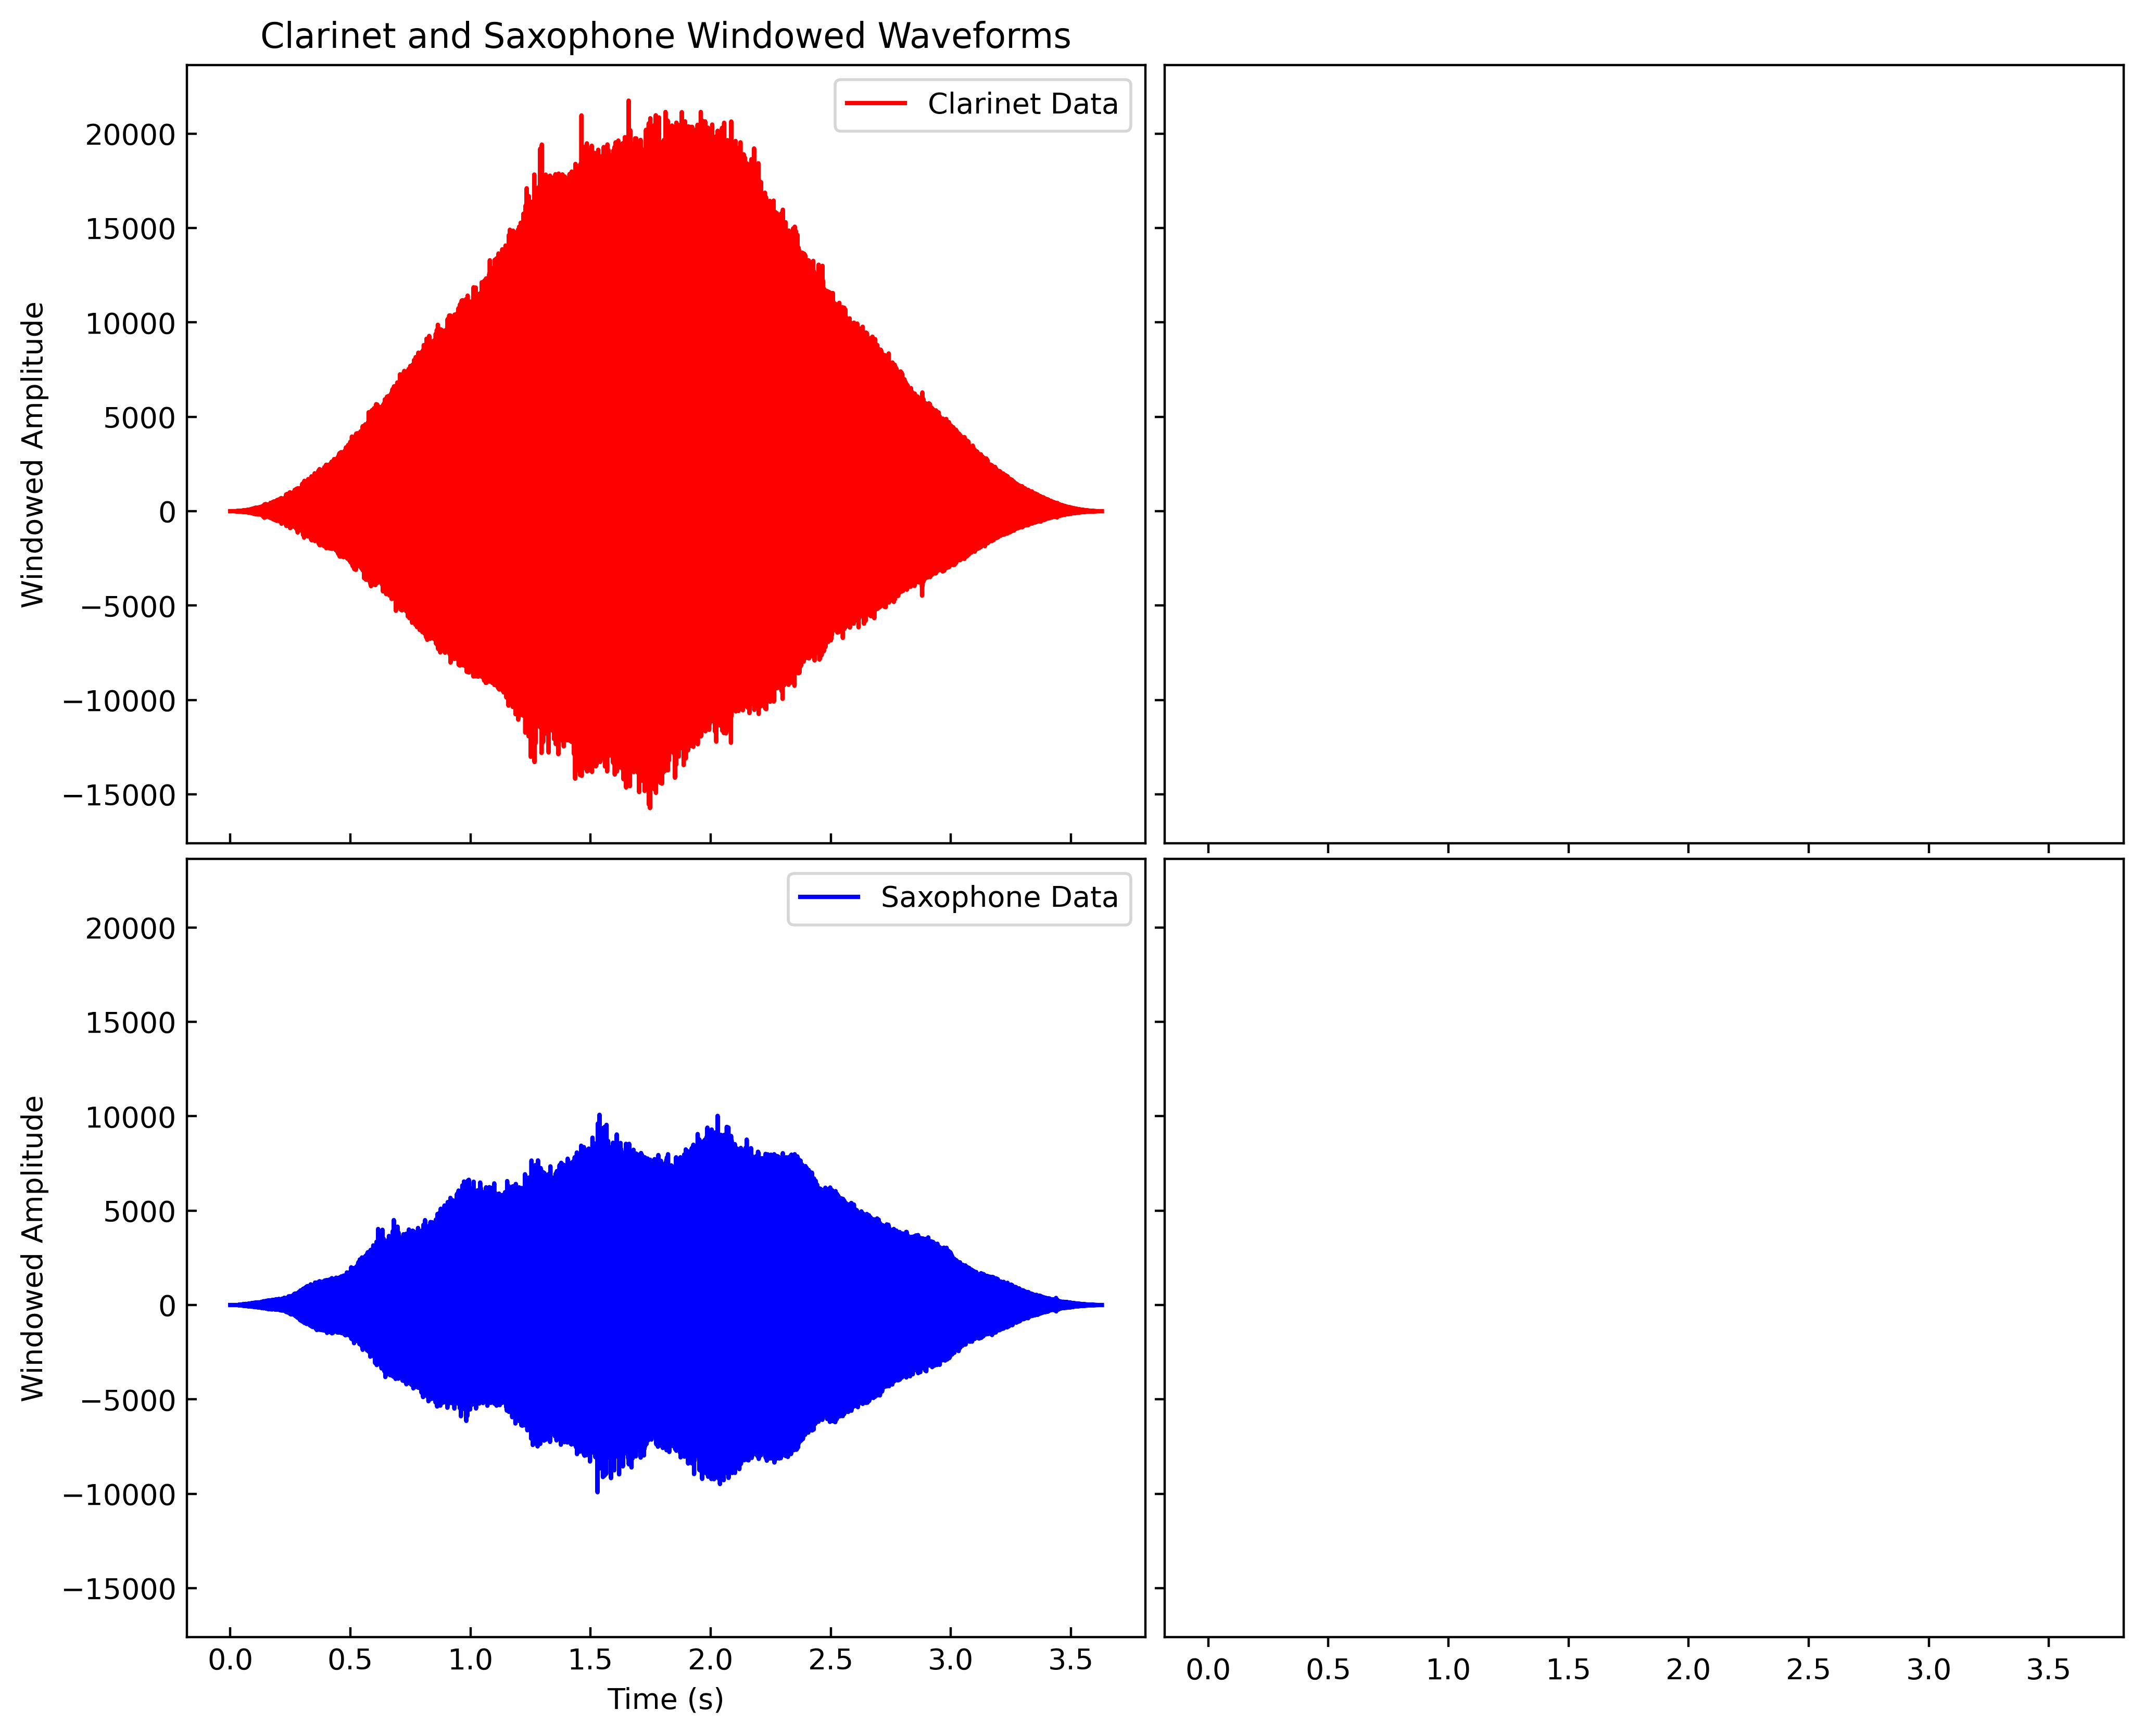

In [141]:
clar = np.loadtxt('data_handouts/clarinet.txt')
sax = np.loadtxt('data_handouts/saxophone.txt')

nn = 160000
tau = 2.268e-5
t = np.linspace(0,(nn-1)*tau,nn)

fig,ax = plt.subplots(2,2, figsize=(12,10), dpi=400, sharex=True, sharey=True)

ax[0,0].set_title('Clarinet and Saxophone Windowed Waveforms')
ax[0,0].plot(t, clar,'r',label='Clarinet Data')
ax[0,0].set_ylabel('Windowed Amplitude')
ax[0,0].tick_params('both', direction='in')
ax[0,0].legend()

ax[1,0].plot(t, sax,'b',label='Saxophone Data')
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Windowed Amplitude')
ax[1,0].tick_params('both', direction='in')
ax[1,0].legend()

plt.subplots_adjust(hspace=0.02,wspace=0.02)
plt.show()

#### B)

In [26]:
clar_fft = np.fft.rfft(clar)
sax_fft = np.fft.rfft(sax)

When the DFT is computed for real input, the negative frequencies are the complex conjugates of the corresponding positive-frequencies, so the negative ones are redundant. This function doesn't compute the negative frequency terms, so the length just becomes n/2 + 1.

#### C)

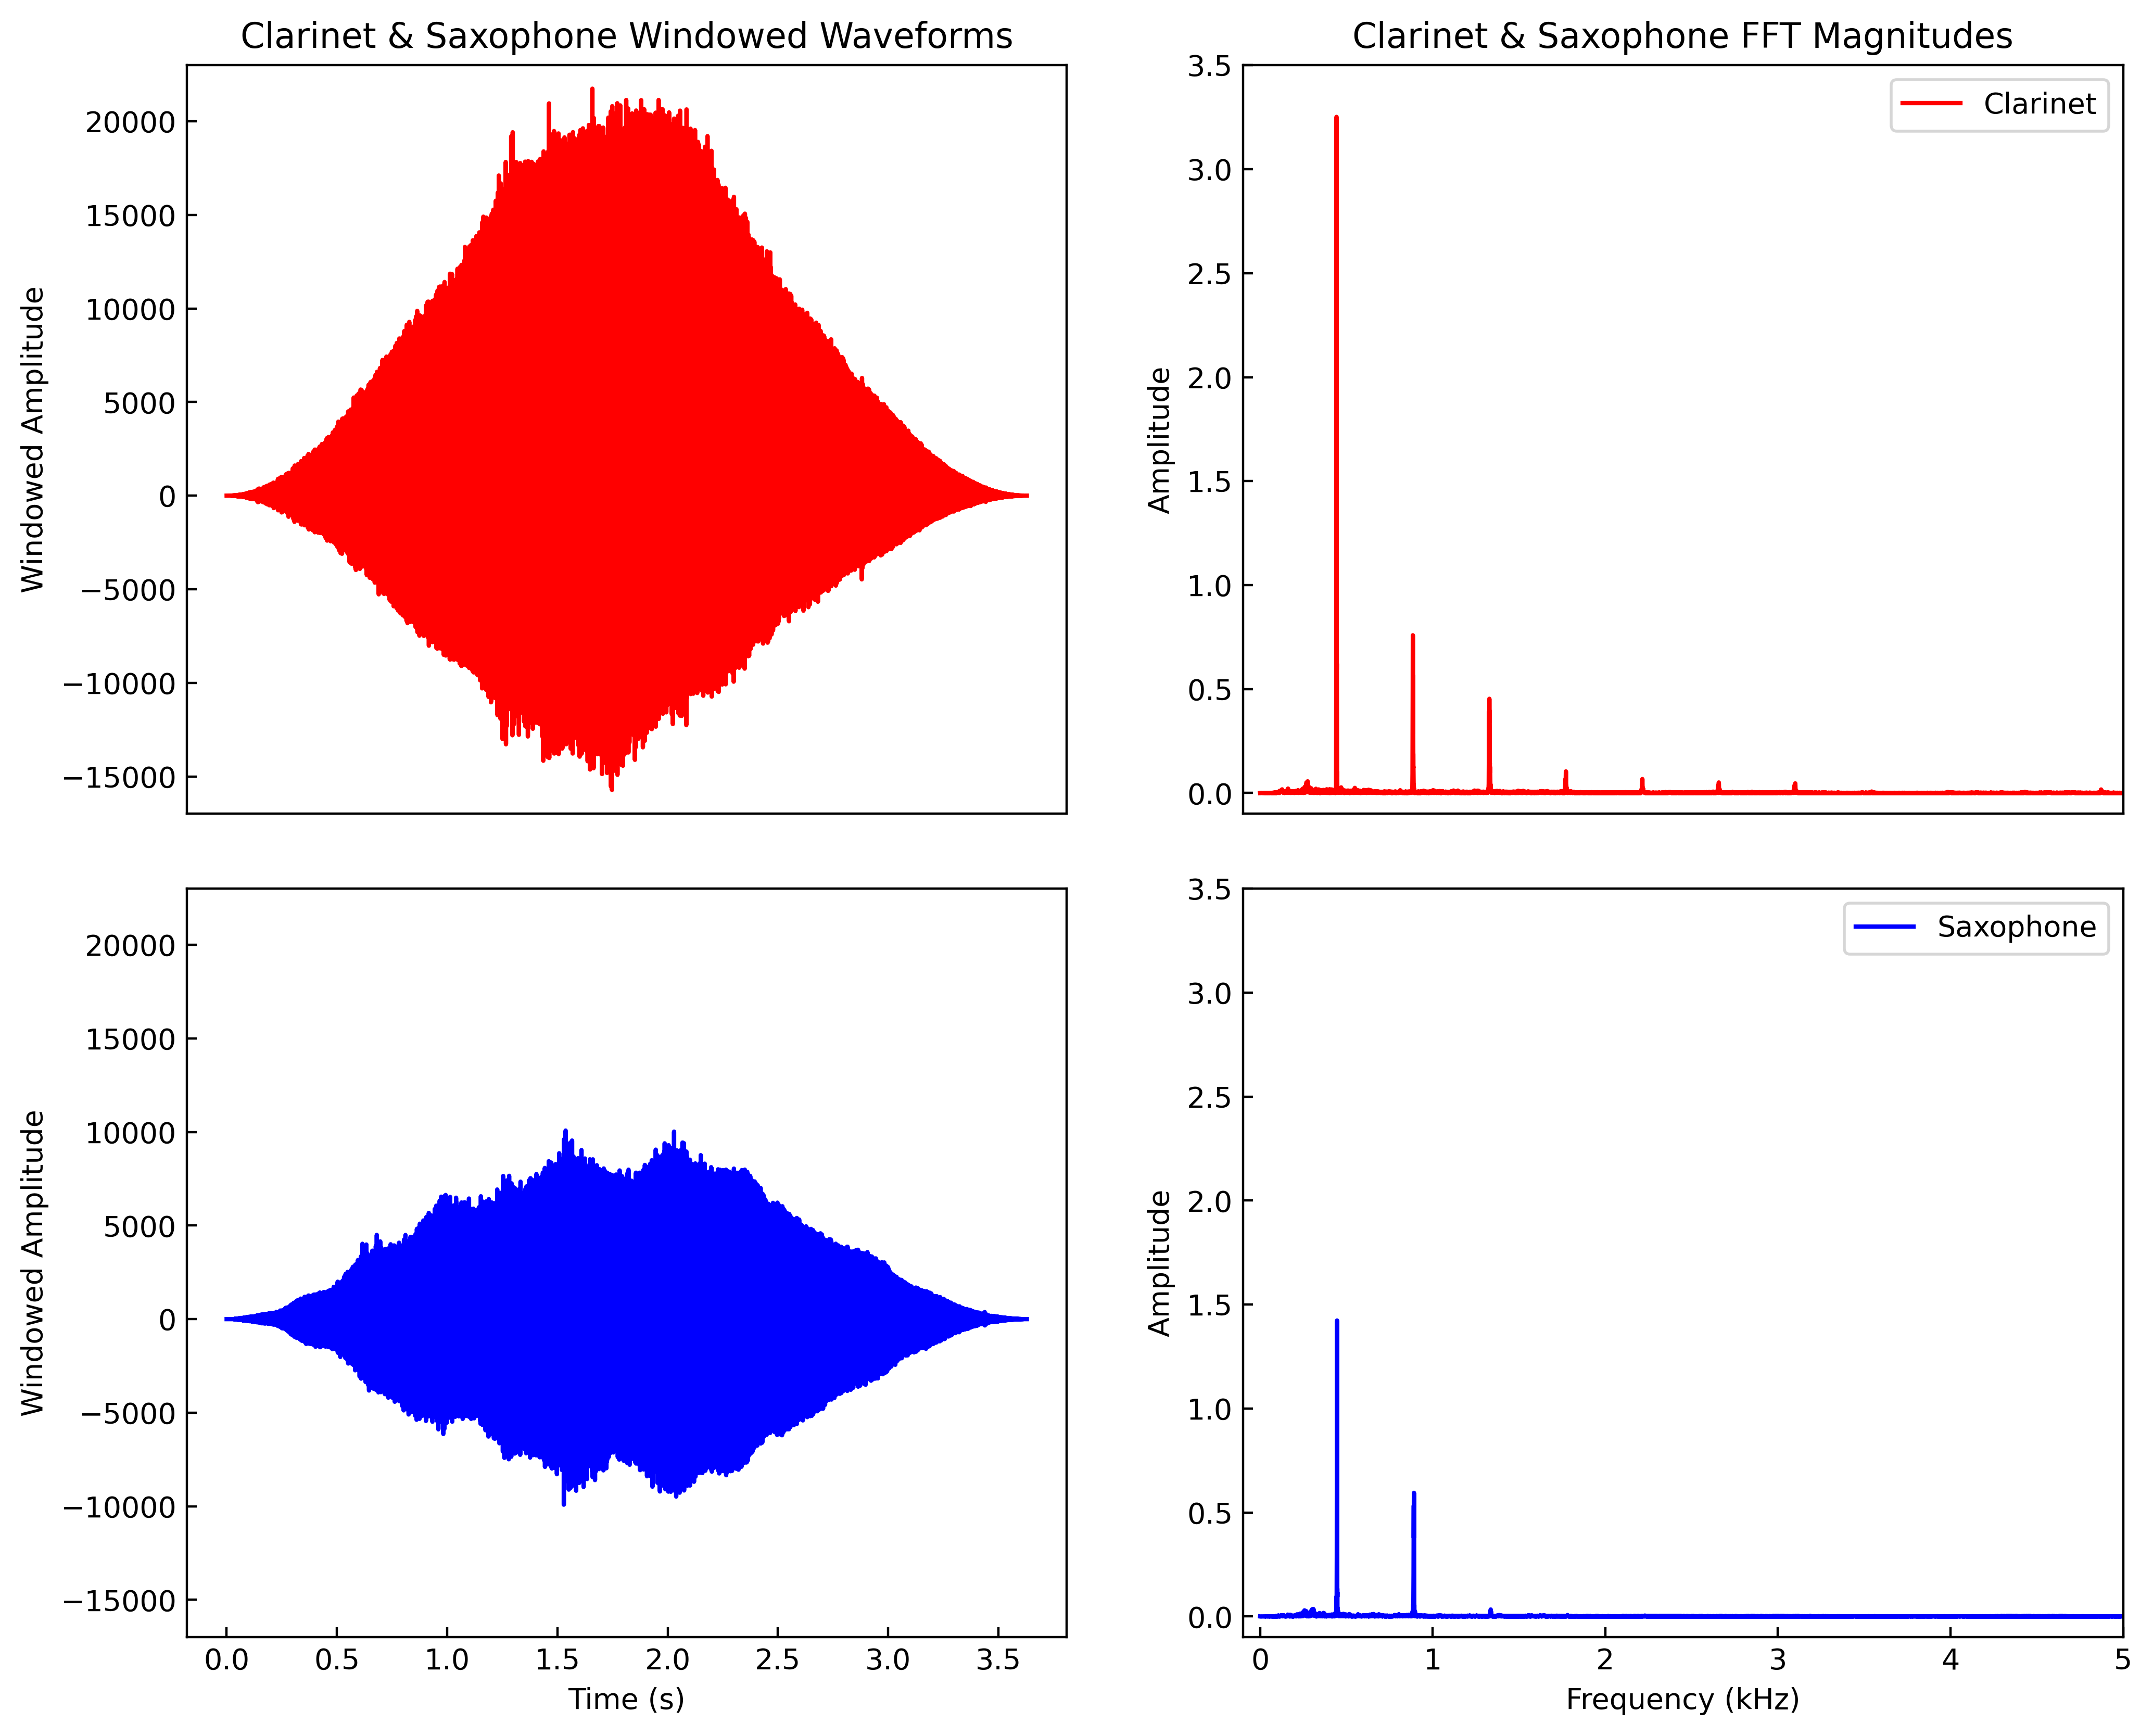

In [155]:
dnu = 1/(nn*tau)
freq = np.linspace(0,(nn/2)*dnu - 1,int(nn/2 + 1))

fig,ax = plt.subplots(2,2, figsize=(12,10), dpi=400)

ax[0,0].set_title('Clarinet & Saxophone Windowed Waveforms')
ax[0,0].plot(t, clar,'r',label='Clarinet Data')
ax[0,0].set_ylim(-17000,23000)
ax[0,0].set_ylabel('Windowed Amplitude')
ax[0,0].tick_params('both', direction='in')
ax[0,0].get_xaxis().set_visible(False)

ax[1,0].plot(t, sax,'b',label='Saxophone Data')
ax[1,0].set_ylim(-17000,23000)
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Windowed Amplitude')
ax[1,0].tick_params('both', direction='in')

ax[0,1].set_title('Clarinet & Saxophone FFT Magnitudes')
ax[0,1].plot(freq/1e3, abs(clar_fft)/1e8,'r',label='Clarinet')
ax[0,1].set_xlim(-0.1,5)
ax[0,1].set_ylim(-0.1,3.5)
ax[0,1].set_ylabel('Amplitude')
ax[0,1].tick_params('both', direction='in')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].legend()

ax[1,1].plot(freq/1e3, abs(sax_fft)/1e8,'b',label='Saxophone')
ax[1,1].set_xlim(-0.1,5)
ax[1,1].set_ylim(-0.1,3.5)
ax[1,1].set_xlabel('Frequency (kHz)')
ax[1,1].set_ylabel('Amplitude')
ax[1,1].tick_params('both', direction='in')
ax[1,1].legend()

plt.subplots_adjust(hspace=0.1,wspace=0.2)
plt.show()

#### D)

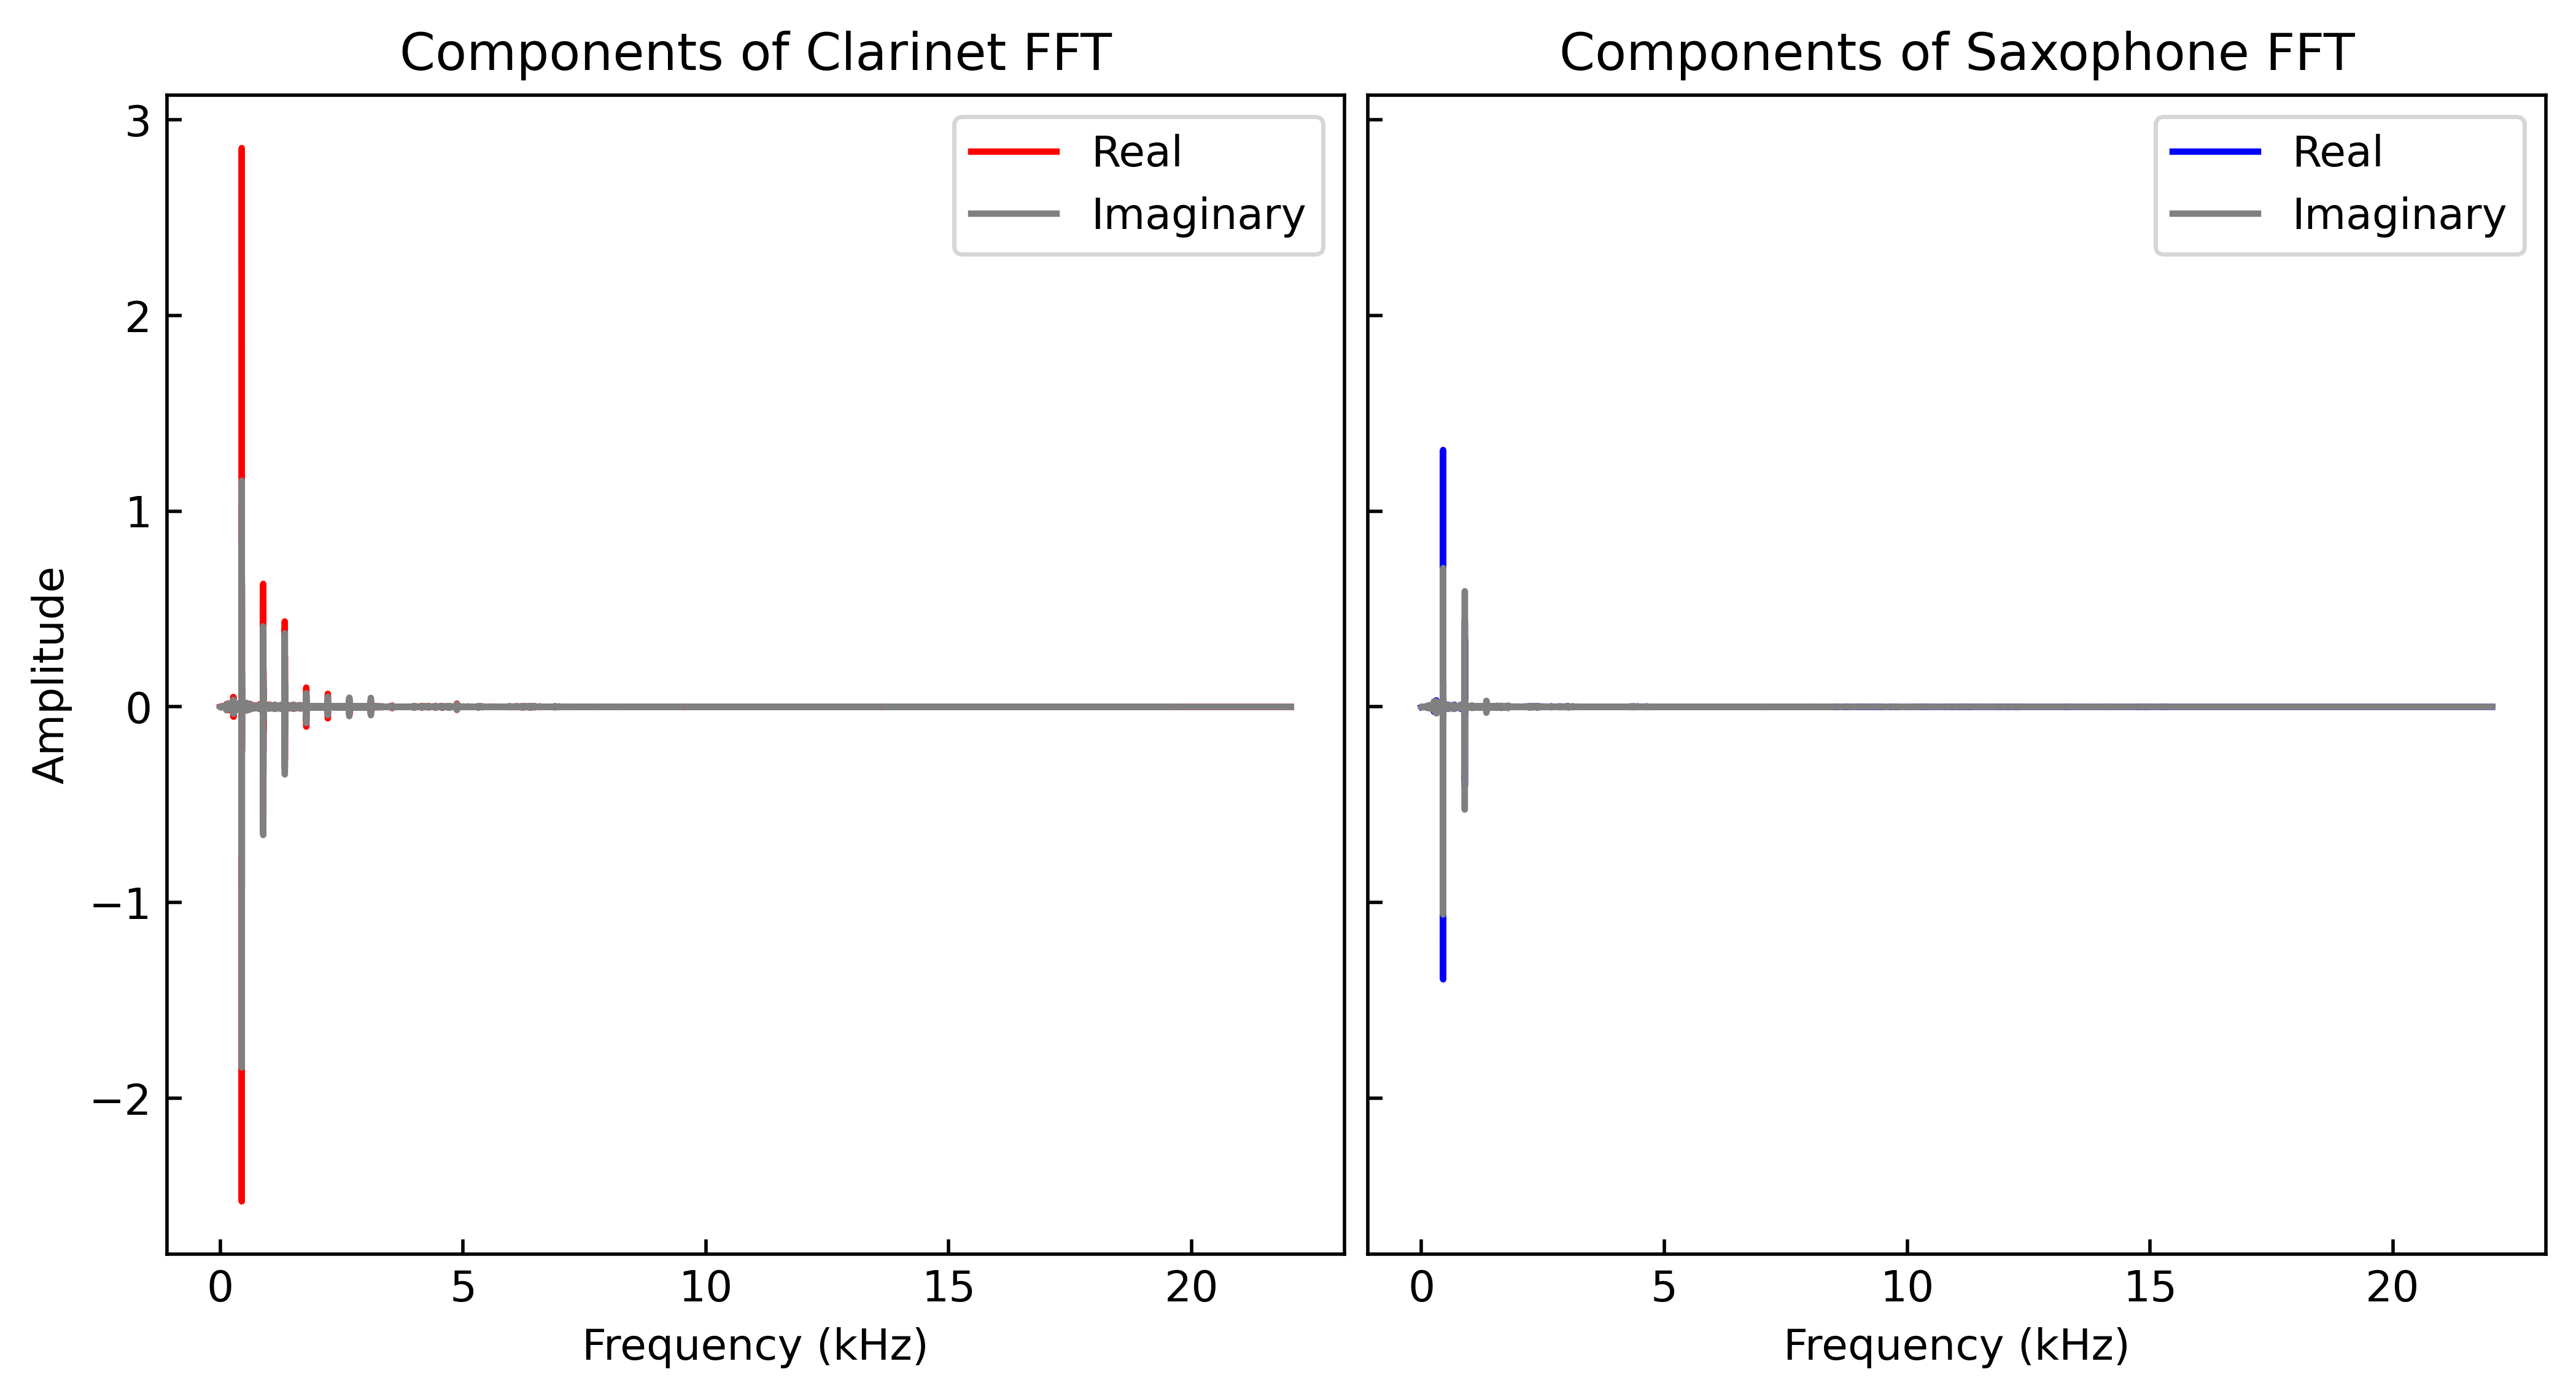

In [153]:
fig,ax = plt.subplots(1,2,figsize=(10,5),dpi=500, sharey=True,sharex=True)

ax[0].set_title('Components of Clarinet FFT')
ax[0].plot(freq/1e3,real(clar_fft)/1e8,'r',label='Real')
ax[0].plot(freq/1e3,imag(clar_fft)/1e8,'grey',label='Imaginary')
ax[0].set_xlabel('Frequency (kHz)')
ax[0].set_ylabel('Amplitude')
ax[0].tick_params('both', direction='in')
ax[0].legend()

ax[1].set_title('Components of Saxophone FFT')
ax[1].plot(freq/1e3,real(sax_fft)/1e8,'b',label='Real')
ax[1].plot(freq/1e3,imag(sax_fft)/1e8,'grey',label='Imaginary')
ax[1].set_xlabel('Frequency (kHz)')
ax[1].tick_params('both', direction='in')
ax[1].legend()

plt.subplots_adjust(wspace=0.02)
plt.show()

They look the same, just including the negative part.

### Part 2

#### A)

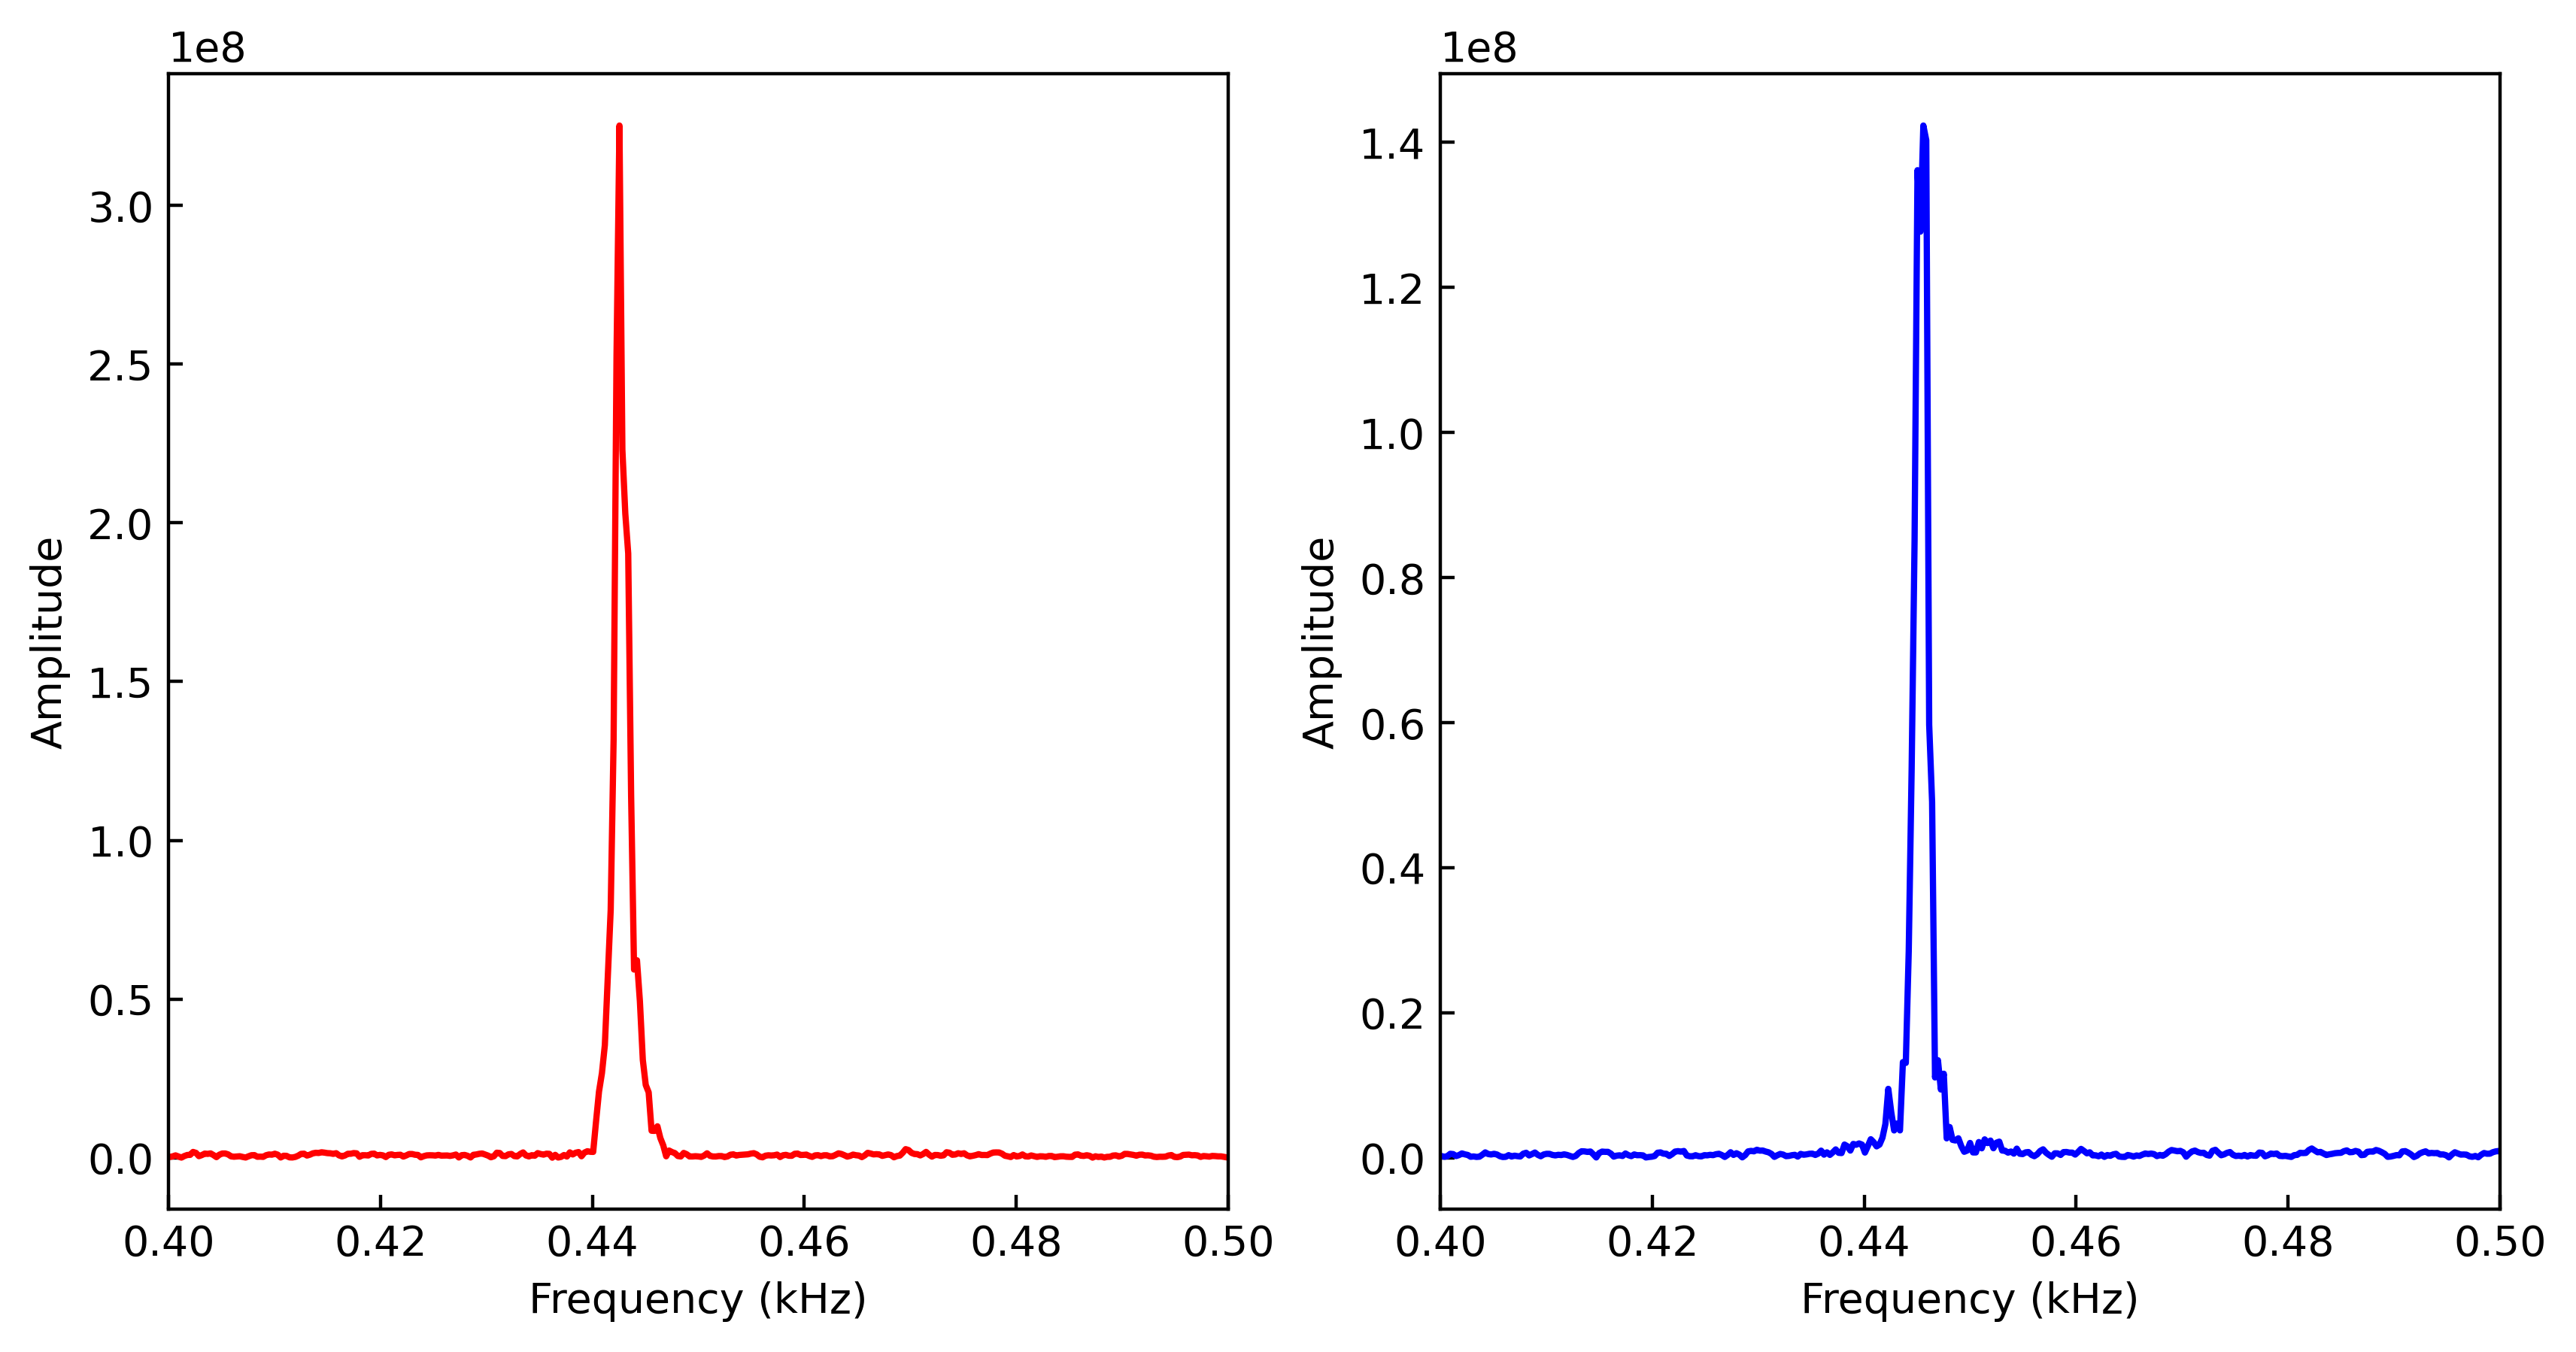

In [63]:
fig,ax = plt.subplots(1,2, figsize=(10,5), dpi=400)

ax[0].plot(freq/1e3, abs(clar_fft),'r')
ax[0].set_xlim(0.4,0.5)
ax[0].set_xlabel('Frequency (kHz)')
ax[0].set_ylabel('Amplitude')
ax[0].tick_params('both', direction='in')

ax[1].plot(freq/1e3, abs(sax_fft),'b')
ax[1].set_xlim(0.4,0.5)
ax[1].set_xlabel('Frequency (kHz)')
ax[1].set_ylabel('Amplitude')
ax[1].tick_params('both', direction='in')

plt.subplots_adjust(hspace=0.25)
plt.show()

I narrowed down the fft plots to the peak frequency which I belive is the main frequency of the note. I would say that the frequency of the notes are ~445Hz which would correspond to an A or A#

#### B)

The main differences in spectra are that the clarinet has a wider range of harmonic frequencies than the saxophone and that the amplitude of the clarinet is over double that of the saxophone. I think the clarinet sounds clearer and louder because it has a wider range of harmonic frequencies and a larger amplitude than the saxophone which has only a couple harmonic frequencies and a much smaller amplitude.

### Part 3

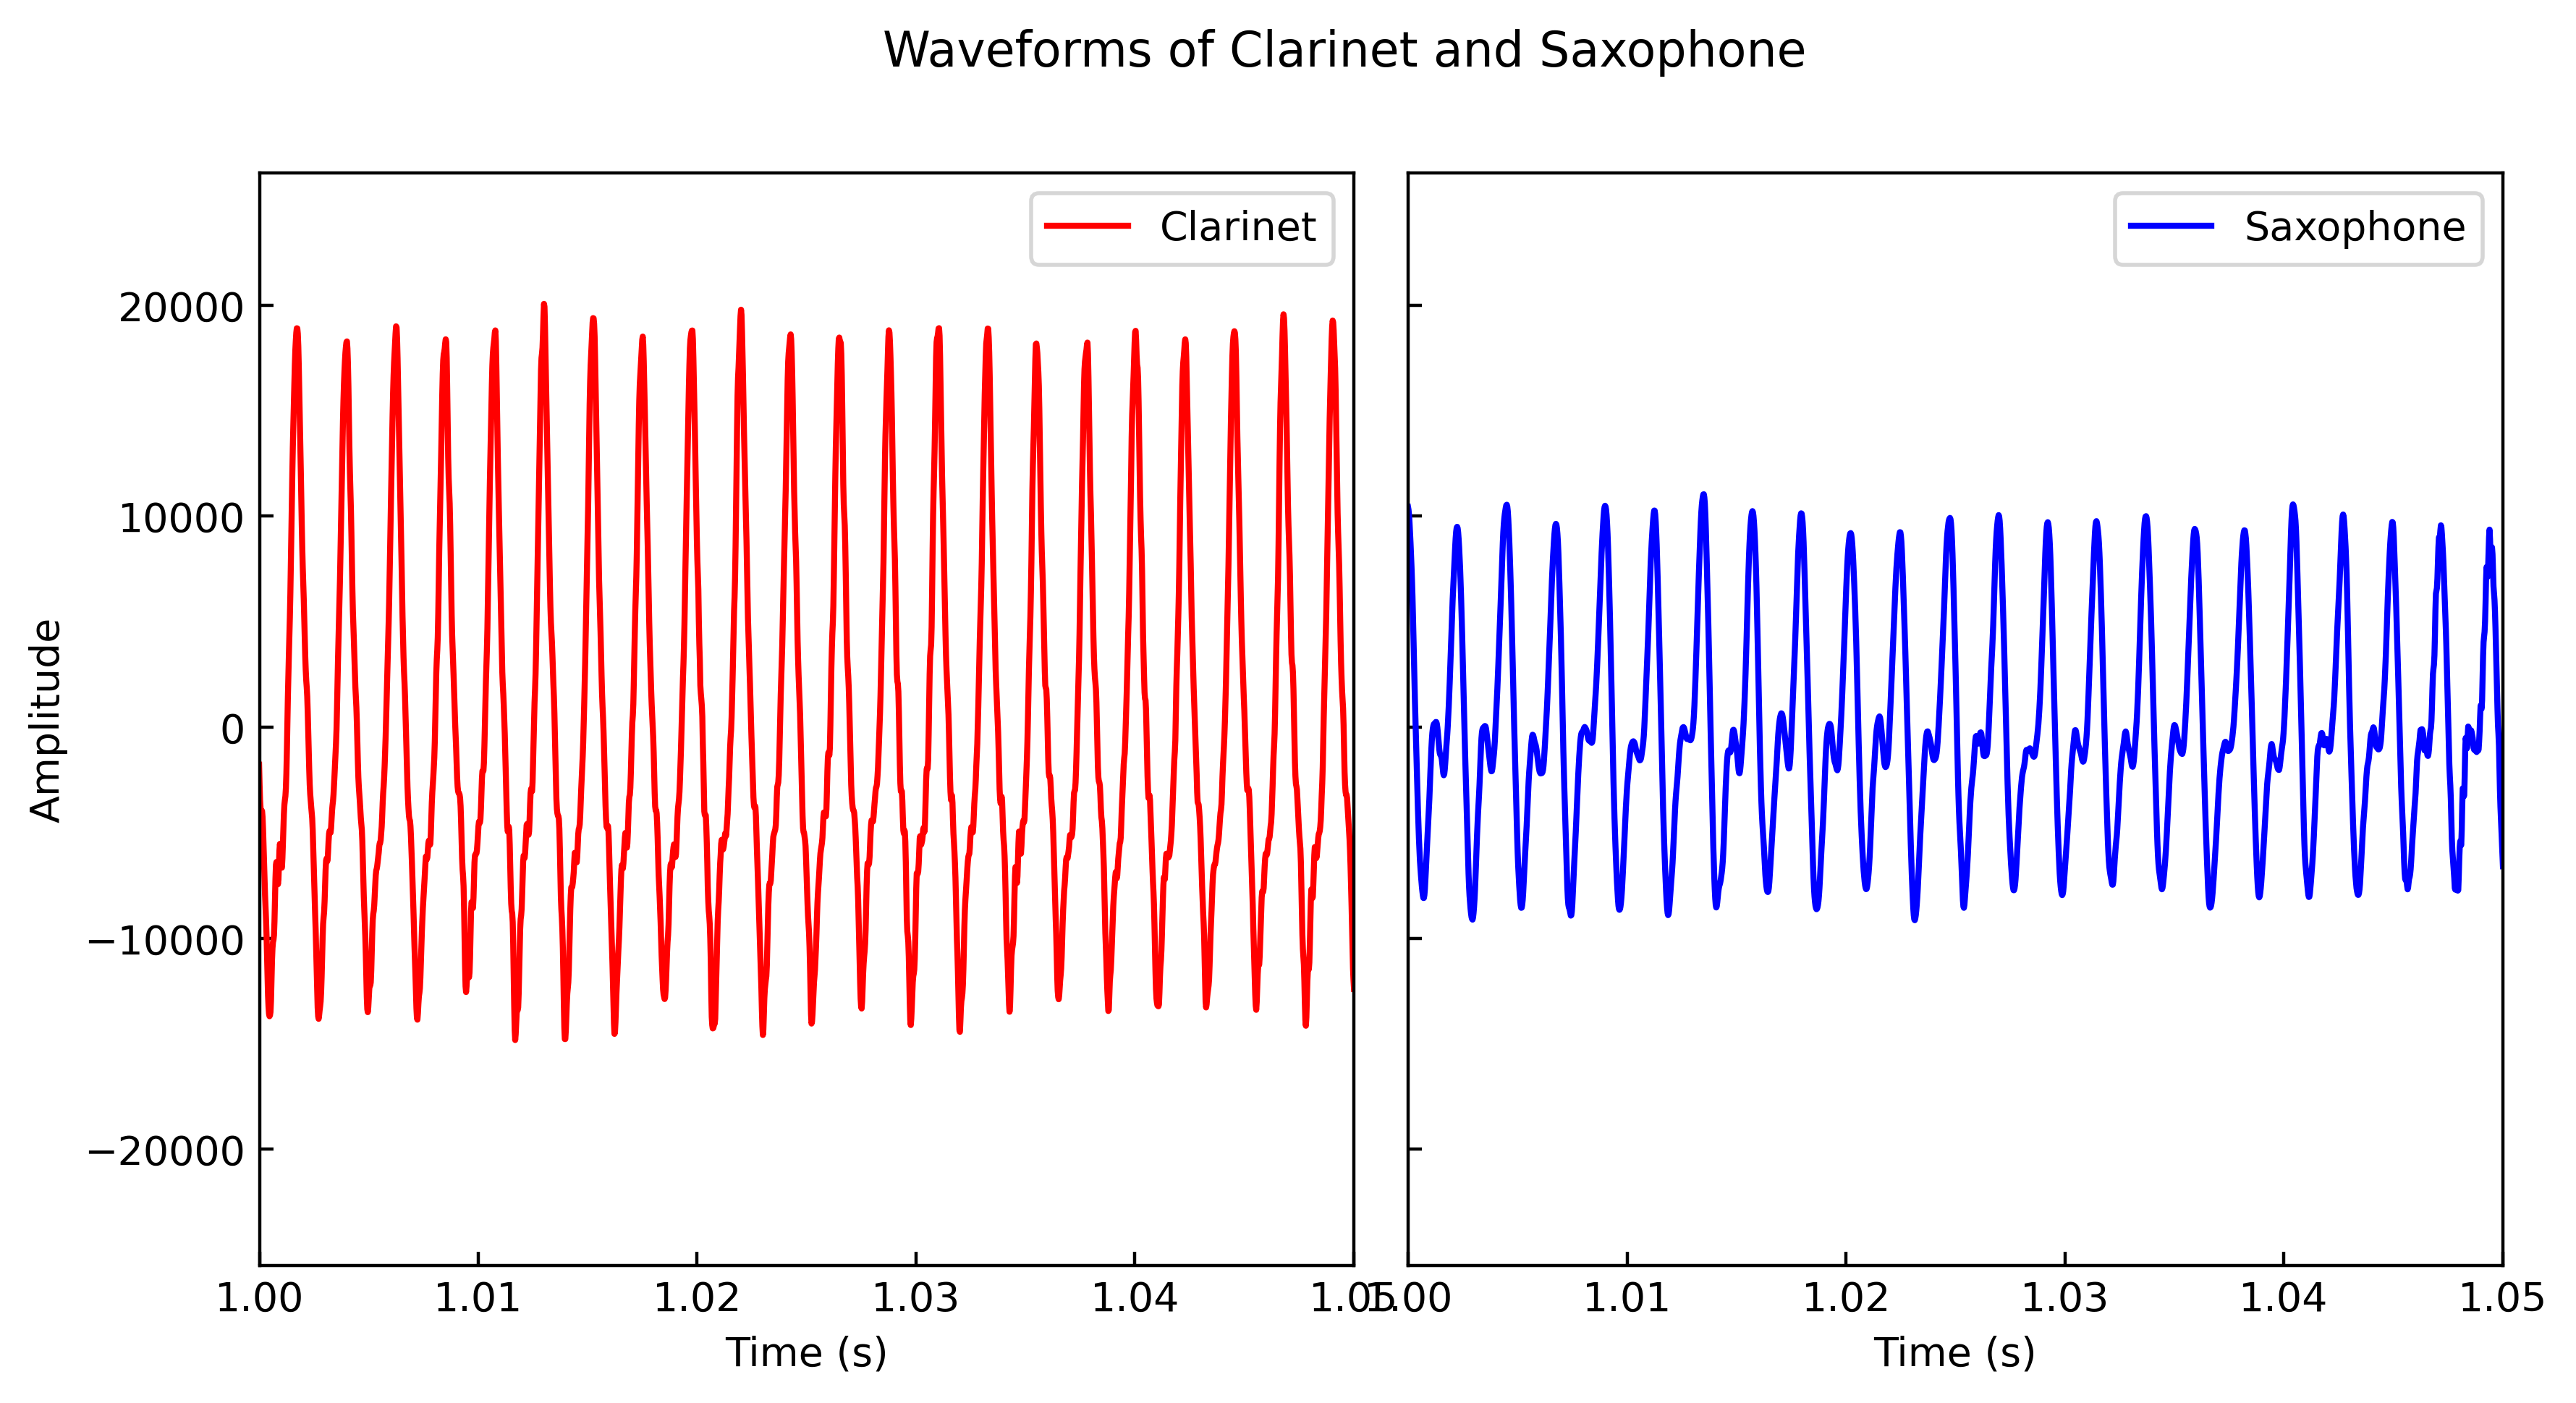

In [117]:
rate, cwavedata = wavfile.read('data_handouts/clarinet.wav')
rate, swavedata = wavfile.read('data_handouts/saxophone.wav')

cwavedata = np.transpose(cwavedata)
swavedata = np.transpose(swavedata)

nn_clar = len(cwavedata[0])
nn_sax = len(swavedata[0])
tau = 2.268e-5
t_clar = np.linspace(0,(nn_clar-1)*tau,nn_clar)
t_sax = np.linspace(0,(nn_sax-1)*tau,nn_sax)

fig,ax = plt.subplots(1,2, figsize=(10,5), dpi=400, sharex=True, sharey=True)

fig.suptitle('Waveforms of Clarinet and Saxophone')

ax[0].plot(t_clar,cwavedata[0],'r',label='Clarinet')
ax[0].set_xlim(1,1.05)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].tick_params('both', direction='in')
ax[0].legend()

ax[1].plot(t_sax,swavedata[0],'b',label='Saxophone')
ax[1].set_xlabel('Time (s)')
ax[1].tick_params('both', direction='in')
ax[1].legend()

plt.subplots_adjust(wspace=0.05)
plt.show()

### Part 4

#### A)

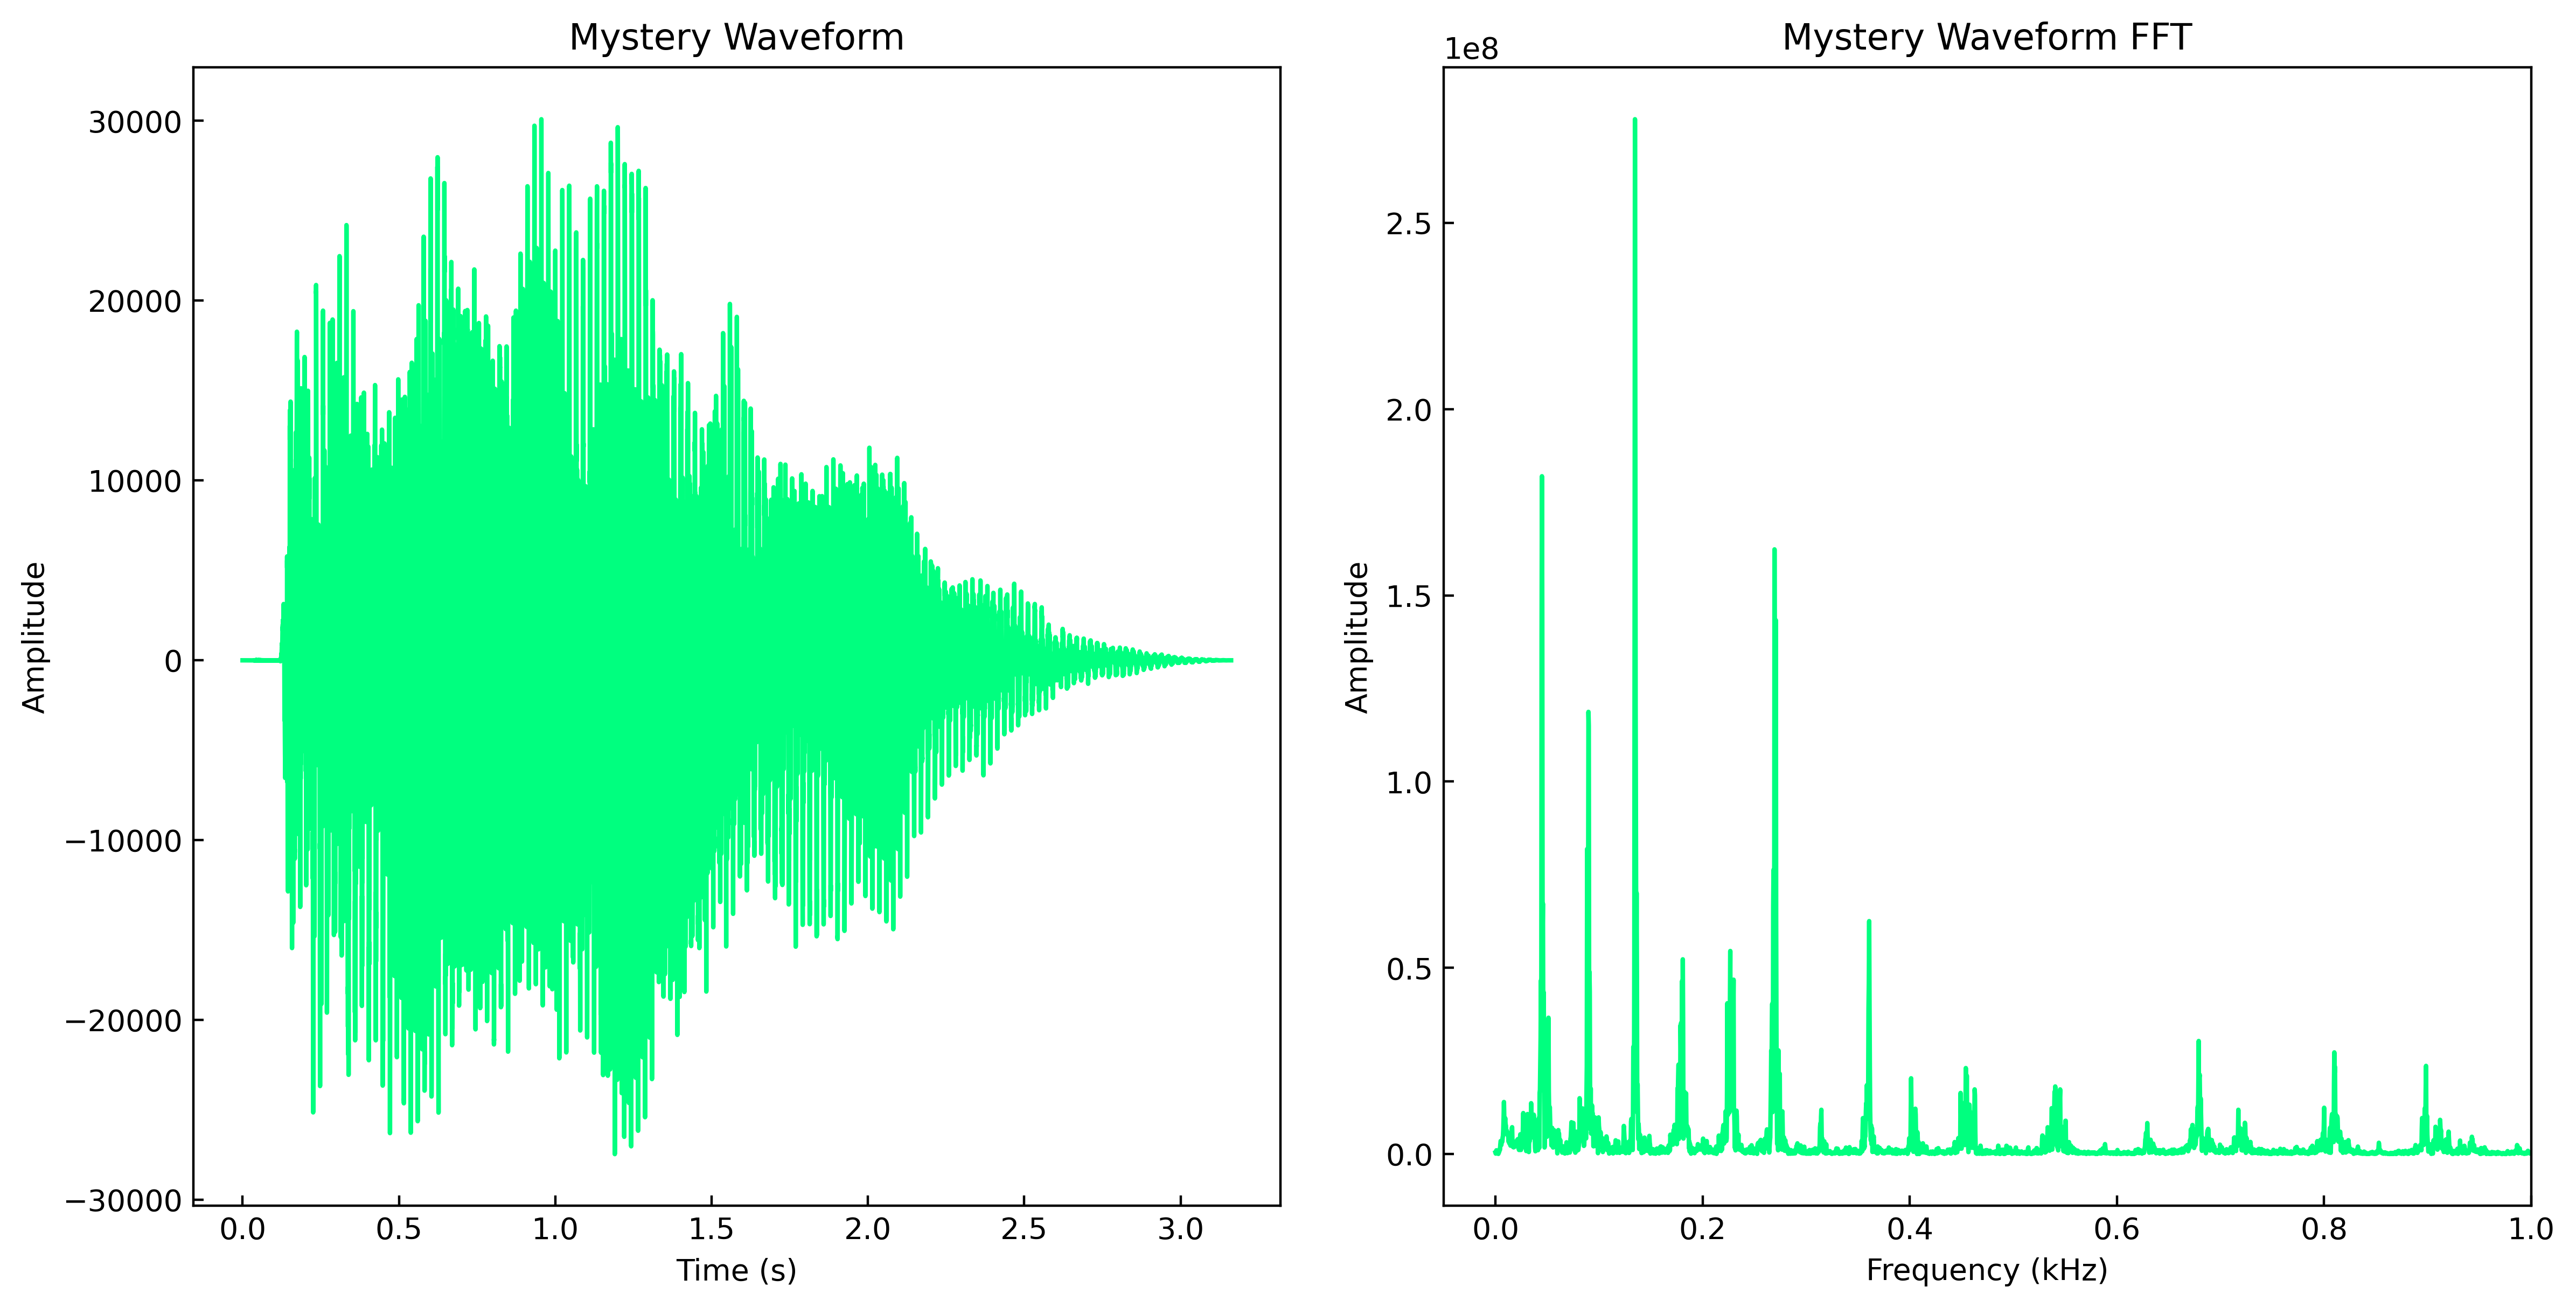

In [130]:
myst = np.loadtxt('data_handouts/mystery.txt')

nn = len(myst)
tau = 2.268e-5
t = np.linspace(0,(nn-1)*tau,nn)

fft = np.fft.rfft(myst)
dnu = 1/(nn*tau)
freq = np.linspace(0,(nn/2)*dnu - 1,int(nn/2 + 1))

fig,ax = plt.subplots(1,2, figsize=(14,7), dpi=400)

ax[0].set_title('Mystery Waveform')
ax[0].plot(t, myst,'springgreen')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].tick_params('both', direction='in')

ax[1].set_title('Mystery Waveform FFT')
ax[1].plot(freq/1e3, abs(fft),'springgreen')
ax[1].set_xlim(-0.05,1)
ax[1].set_xlabel('Frequency (kHz)')
ax[1].set_ylabel('Amplitude')
ax[1].tick_params('both', direction='in')

plt.subplots_adjust(wspace=0.15)
plt.show()

The dominant frequency is ~170Hz with maybe one harmonic and another frequency ~50Hz with a couple harmonics. Should sound louder than the sax, softer than clarinet, with a much lower pitch.